In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\Dath\Downloads\googleplaystore.csv\googleplaystoredataset.csv")

# Preview the dataset
print(df.head())
print(df.info())


                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [236]:
# Check for null values in each column
print(df.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [238]:
# Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)


App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64


In [240]:
df['Rating'] = df['Rating'].fillna(df['Rating'].median())  # Fill missing ratings with median
df['Type'] = df['Type'].fillna('Free')  # Assume missing values in Type are 'Free'
df['Content Rating'] = df['Content Rating'].fillna('Everyone')  # Replace with common value

In [242]:
def clean_reviews(value):
    if isinstance(value, str):  # Check if the value is a string
        if 'M' in value:  # Handle values like '3.0M'
            return float(value.replace('M', '')) * 1e6
        elif value.isnumeric():  # Check if the string is numeric
            return int(value)
        else:
            return np.nan  # Handle non-numeric strings
    elif isinstance(value, (int, float)):  # If the value is already numeric
        return value
    else:
        return np.nan  # Handle unexpected data types

# Apply the cleaning function
df['Reviews'] = df['Reviews'].apply(clean_reviews)

# Handle missing values if any remain
df['Reviews'] = df['Reviews'].fillna(0).astype(int)

# Verify the result
print(df['Reviews'].head())

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int32


In [244]:
print(df.head())
print(df.info())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size     Installs  Type Price Content Rating  \
0      159   19M      10,000+  Free     0       Everyone   
1      967   14M     500,000+  Free     0       Everyone   
2    87510  8.7M   5,000,000+  Free     0       Everyone   
3   215644   25M  50,000,000+  Free     0           Teen   
4      967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pr

In [246]:
print(df.isnull().sum())


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64


In [248]:
# Rows with missing 'Current Ver'
print(df[df['Current Ver'].isnull()])

# Rows with missing 'Android Ver'
print(df[df['Android Ver'].isnull()])
df['Current Ver'] = df['Current Ver'].fillna('Unknown')
df['Android Ver'] = df['Android Ver'].fillna

                                   App             Category  Rating  Reviews  \
15     Learn To Draw Kawaii Characters       ART_AND_DESIGN     3.2       55   
1553              Market Update Helper   LIBRARIES_AND_DEMO     4.1    20145   
6322            Virtual DJ Sound Mixer                TOOLS     4.2     4010   
6803                         BT Master               FAMILY     4.3        0   
7333                       Dots puzzle               FAMILY     4.0      179   
7407                   Calculate My IQ               FAMILY     4.3       44   
7730                            UFO-CQ                TOOLS     4.3        1   
10342                   La Fe de Jesus  BOOKS_AND_REFERENCE     4.3        8   

       Size    Installs  Type  Price Content Rating             Genres  \
15     2.7M      5,000+  Free      0       Everyone       Art & Design   
1553    11k  1,000,000+  Free      0       Everyone   Libraries & Demo   
6322   8.7M    500,000+  Free      0       Everyone      

In [250]:
print(df.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [252]:
print(df.dtypes)


App                object
Category           object
Rating            float64
Reviews             int32
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [254]:
def convert_size(size):
    if isinstance(size, str):
        if 'M' in size:  # Convert MB
            return float(size.replace('M', ''))
        elif 'k' in size:  # Convert KB to MB
            return float(size.replace('k', '')) / 1024
        else:  # Handle 'Varies with device'
            return None
    return size

df['Size'] = df['Size'].apply(convert_size)
df['Size'] = df['Size'].fillna(df['Size'].median())  # Fill missing sizes with the median
print(df['Size'].head())


0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64


In [256]:
# Replace invalid 'Installs' values with 0
def clean_installs(value):
    if isinstance(value, str) and value.replace(',', '').replace('+', '').isnumeric():
        return int(value.replace(',', '').replace('+', ''))
    else:
        return 0  # Default value for invalid entries

df['Installs'] = df['Installs'].apply(clean_installs)

# Verify the cleaned column
print(df['Installs'].head())



0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64


In [258]:
def clean_price(value):
    try:
        # Remove the '$' symbol and convert to float
        return float(value.replace('$', ''))
    except:
        # Handle invalid values by replacing them with 0
        return 0

# Apply the cleaning function
df['Price'] = df['Price'].apply(clean_price)

# Verify the result
print(df['Price'].head())
print(df['Price'].dtype)


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64
float64


In [260]:
# Standardize text columns
df['Type'] = df['Type'].str.strip().str.lower()
df['Category'] = df['Category'].str.strip().str.lower()
df['Content Rating'] = df['Content Rating'].str.strip().str.lower()
df['Genres'] = df['Genres'].str.strip().str.lower()

print(df['Type'].unique())


['free' 'paid' '0']


In [262]:
from pandas.errors import ParserError

# Function to clean and parse dates
def clean_date(value):
    try:
        # Try to parse the date
        return pd.to_datetime(value, format="%B %d, %Y", errors="coerce")
    except (ValueError, ParserError):
        return pd.NaT  # Return NaT (Not a Time) for invalid dates

# Apply the cleaning function
df['Last Updated'] = df['Last Updated'].apply(clean_date)

# Handle missing values (e.g., replace NaT with the median date)
df['Last Updated'] = df['Last Updated'].fillna(df['Last Updated'].median())

# Verify the cleaned column
print(df['Last Updated'].head())


0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]


In [263]:
# Replace 'Varies with device' with NaN and fill with the mode
df['Android Ver'] = df['Android Ver'].replace('Varies with device', None)
df['Android Ver'] = df['Android Ver'].fillna(df['Android Ver'].mode()[0])
print(df['Android Ver'].unique())


[<bound method NDFrame.fillna of 0              4.0.3 and up
 1              4.0.3 and up
 2              4.0.3 and up
 3                4.2 and up
 4                4.4 and up
                 ...
 10836            4.1 and up
 10837            4.1 and up
 10838            2.2 and up
 10839    Varies with device
 10840    Varies with device
 Name: Android Ver, Length: 10841, dtype: object>           ]


In [264]:
print(df.dtypes)



App                       object
Category                  object
Rating                   float64
Reviews                    int32
Size                     float64
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object


In [265]:
# Filter fitness apps based on the 'Category' column
fitness_apps = df[df['Category'].str.contains("Health", case=False, na=False)]

# Average rating for fitness apps
fitness_rating = fitness_apps['Rating'].mean()
# Average rating for other apps
other_rating = df[~df['Category'].str.contains("Health", case=False, na=False)]['Rating'].mean()

print(f"Fitness Apps Average Rating: {fitness_rating}")
print(f"Other Apps Average Rating: {other_rating}")


Fitness Apps Average Rating: 4.280058651026393
Other Apps Average Rating: 4.205495238095238


In [270]:
# Find common and high-performing features (Genres)
genre_ratings = fitness_apps.groupby('Genres')['Rating'].mean().sort_values(ascending=False)
genre_installs = fitness_apps.groupby('Genres')['Installs'].mean().sort_values(ascending=False)

# Display the top genres by rating and installs
print("Top Genres by Rating:\n", genre_ratings.head(10))
print("Top Genres by Installs:\n", genre_installs.head(10))


Top Genres by Rating:
 Genres
health & fitness    4.280059
Name: Rating, dtype: float64
Top Genres by Installs:
 Genres
health & fitness    4.642441e+06
Name: Installs, dtype: float64


In [272]:
# Analyze price trends
genre_prices = fitness_apps.groupby('Genres')['Price'].mean().sort_values(ascending=False)
print("Average Price by Genre:\n", genre_prices.head(10))


Average Price by Genre:
 Genres
health & fitness    0.197478
Name: Price, dtype: float64


In [274]:
print(df['Category'].unique())
# Filter fitness apps using 'Category'
fitness_apps = df[df['Category'].str.strip().str.lower() == "health_and_fitness"]

# Check the number of rows in the filtered dataframe
print(f"Number of rows in fitness_apps: {fitness_apps.shape[0]}")

# Preview the filtered dataset
print(fitness_apps.head())



['art_and_design' 'auto_and_vehicles' 'beauty' 'books_and_reference'
 'business' 'comics' 'communication' 'dating' 'education' 'entertainment'
 'events' 'finance' 'food_and_drink' 'health_and_fitness' 'house_and_home'
 'libraries_and_demo' 'lifestyle' 'game' 'family' 'medical' 'social'
 'shopping' 'photography' 'sports' 'travel_and_local' 'tools'
 'personalization' 'productivity' 'parenting' 'weather' 'video_players'
 'news_and_magazines' 'maps_and_navigation' '1.9']
Number of rows in fitness_apps: 341
                                                 App            Category  \
1256                     Home Workout - No Equipment  health_and_fitness   
1257                  Step Counter - Calorie Counter  health_and_fitness   
1258        Lose Belly Fat in 30 Days - Flat Stomach  health_and_fitness   
1259  Pedometer - Step Counter Free & Calorie Burner  health_and_fitness   
1260               Six Pack in 30 Days - Abs Workout  health_and_fitness   

      Rating  Reviews  Size  Instal

In [276]:
# Total and average installs for fitness apps
total_installs = fitness_apps['Installs'].sum()
average_installs = fitness_apps['Installs'].mean()
print(f"Total Installs for Fitness Apps: {total_installs}")
print(f"Average Installs per Fitness App: {average_installs}")


Total Installs for Fitness Apps: 1583072512
Average Installs per Fitness App: 4642441.3841642225


Fitness App Downloads by Year:
 Year
2012       1100000
2013         10000
2014        610000
2015        353600
2016       1843060
2017      10458576
2018    1568697276
Name: Installs, dtype: int64


C:\Users\Dath\AppData\Local\Temp\ipykernel_1416\424421718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fitness_apps['Year'] = fitness_apps['Last Updated'].dt.year


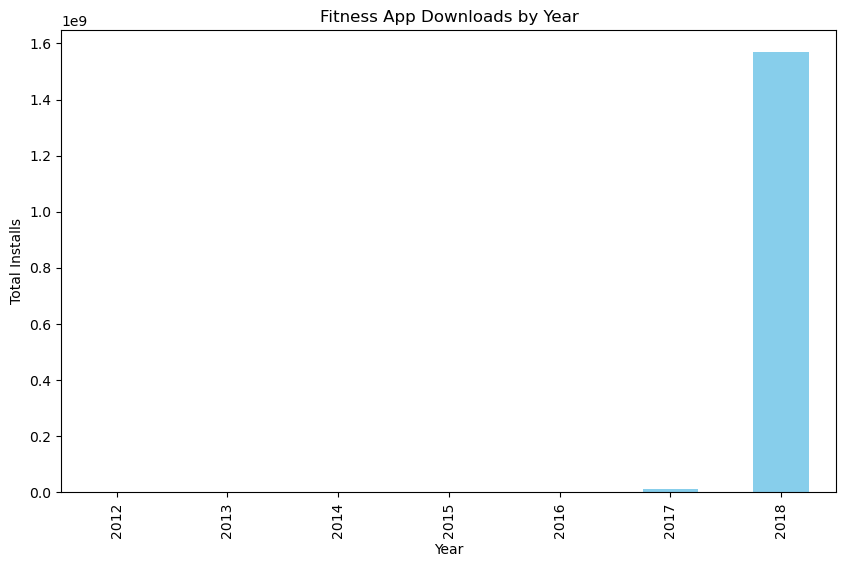

In [278]:
# Ensure 'Last Updated' is in datetime format
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
fitness_apps['Year'] = fitness_apps['Last Updated'].dt.year

# Group by year and calculate total installs
fitness_installs_by_year = fitness_apps.groupby('Year')['Installs'].sum()

# Print and plot yearly trends
print("Fitness App Downloads by Year:\n", fitness_installs_by_year)

# Plot yearly trends
import matplotlib.pyplot as plt
fitness_installs_by_year.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Fitness App Downloads by Year')
plt.xlabel('Year')
plt.ylabel('Total Installs')
plt.show()


In [281]:
print(f"Number of fitness apps: {fitness_apps.shape[0]}")
print(fitness_apps['Year'].value_counts())


Number of fitness apps: 341
Year
2018    274
2017     36
2016     16
2015      9
2014      3
2012      2
2013      1
Name: count, dtype: int64


In [283]:
print(fitness_apps['Installs'].describe())


count    3.410000e+02
mean     4.642441e+06
std      2.822451e+07
min      1.000000e+00
25%      5.000000e+03
50%      5.000000e+05
75%      5.000000e+06
max      5.000000e+08
Name: Installs, dtype: float64


In [285]:
import matplotlib.pyplot as plt

fitness_installs_per_year.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Fitness App Downloads by Year')
plt.xlabel('Year')
plt.ylabel('Average Installs per App')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


NameError: name 'fitness_installs_per_year' is not defined

In [289]:
fitness_installs_per_year = fitness_apps.groupby('Year')['Installs'].mean()
print(fitness_installs_per_year)
fitness_installs_weighted = fitness_apps.groupby('Year')['Installs'].sum() / fitness_apps.groupby('Year')['Installs'].count()
print(fitness_installs_weighted)


Year
2012    5.500000e+05
2013    1.000000e+04
2014    2.033333e+05
2015    3.928889e+04
2016    1.151912e+05
2017    2.905160e+05
2018    5.725173e+06
Name: Installs, dtype: float64
Year
2012    5.500000e+05
2013    1.000000e+04
2014    2.033333e+05
2015    3.928889e+04
2016    1.151912e+05
2017    2.905160e+05
2018    5.725173e+06
Name: Installs, dtype: float64


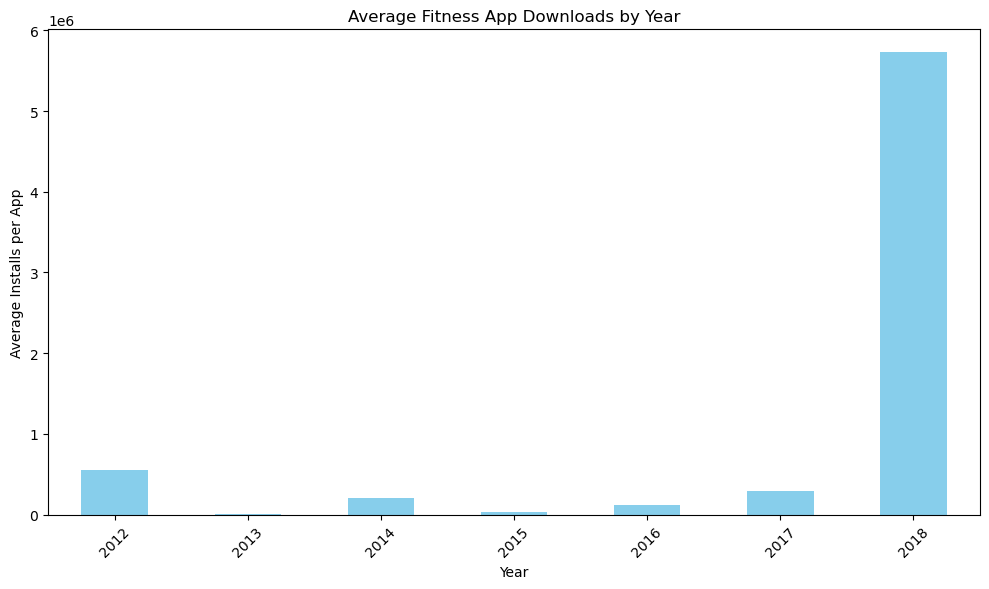

In [291]:
fitness_installs_per_year.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Fitness App Downloads by Year')
plt.xlabel('Year')
plt.ylabel('Average Installs per App')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [293]:
# Export the cleaned DataFrame to an Excel file
output_file_path = "cleaned_data.xlsx"  # Define the output file name
df.to_excel(output_file_path, index=False)  # Set index=False to avoid exporting the DataFrame index

print(f"Cleaned data successfully exported to {output_file_path}")


Cleaned data successfully exported to cleaned_data.xlsx
